In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telecom-churncsv/telecom_churn.csv


#  Article outline 
Demonstration of main ***Pandas***  methods

##  Demonstration of main Pandas methods
Pandas is a Python library that provides extensive means for data analysis. 
The main data structures in Pandas are implemented with [**Series**] and [**DataFrame**]classes. 
The former is a one-dimensional indexed array of some fixed data type. 
The latter is a two-dimensional data structure - a table - where each column contains data of the same type. 

In [110]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2)

We set the decimal data display settings to two meaningful digits

We'll demonstrate the main methods in action by analyzing a dataset on the churn rate of telecom operator clients. Let's read the data (using read_csv), and take a look at the first 5 lines using the head method:

In [111]:
df = pd.read_csv("/kaggle/input/telecom-churncsv/telecom_churn.csv")
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Each row is an instance, and the columns are the features of this instance.

Let's take a look at the data dimensions, attribute names, and feature types.


In [112]:
print(df.shape)
print(df.columns)

(3333, 21)
Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


We can use the **info()** method to output some general information about the dataframe:

In [113]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

**bool**, **int64**, **float64** and **object** are the data types of our features.

 We see that **1** feature is logical (bool), **3** features are of type object, and **16** features are numeric.

We can change the column type with the astype method. Let's apply this method to the **Churn** feature to convert it into int64:

In [114]:
df["churn"] = df["churn"].astype("int64")

The **describe** method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [115]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56,0.14
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32,0.35
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00,0.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00,0.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00,0.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00,1.00


In order to see statistics on **non-numerical features**, one has to explicitly indicate data types of interest in the include parameter.

In [116]:
df.describe(include=["object", "bool"])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,382-4657,no,no
freq,106,1,3010,2411


For categorical (type object) and boolean (type bool) features we can use the **value_counts** method. Let's have a look at the distribution of Churn:

In [117]:
df["churn"].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

To calculate **fractions**, pass normalize=True to the value_counts function.

In [118]:
df["churn"].value_counts(normalize=True)

churn
0    0.86
1    0.14
Name: proportion, dtype: float64

**Sorting**

A Data Frame can be sorted by the value of one of the variables (i.e columns). 

In [119]:
df.sort_values(by="total day charge", ascending=False).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,415,343-5709,no,no,0,350.8,75,59.64,...,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,345-9140,yes,no,0,346.8,55,58.96,...,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,348-1163,yes,no,0,345.3,81,58.70,...,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,370-9116,no,no,0,337.4,120,57.36,...,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,373-2053,no,no,0,335.5,77,57.04,...,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


**We can also sort by multiple columns:**

In [120]:
df.sort_values(by=["churn", "total day charge"], ascending=[True, False]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
688,MN,13,510,338-7120,no,yes,21,315.6,105,53.65,...,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,363-7802,no,yes,31,313.8,87,53.35,...,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,373-6784,no,no,0,310.4,97,52.77,...,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,351-7369,no,yes,36,309.9,90,52.68,...,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,388-8583,no,yes,28,308.0,123,52.36,...,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexing and retrieving data 
A DataFrame can be indexed in a few different ways.



In [121]:
df["churn"].mean()

0.14491449144914492

How much time (on average) do churned users spend on the phone during daytime?

In [122]:
df[df["churn"] == 1]["total day minutes"].mean()

206.91407867494823

Data Frames can be indexed by column name (label) or row name (index) or by the serial number of a row.

 The **loc()** method is used for indexing by name, while **iloc()** is used for indexing by number.

In [123]:
df.loc[0:5, "state":"area code"]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [124]:
df.iloc[0:5, 0:3]

,state,account length,area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or the last line of the data frame, we can use the df[:1] or df[-1:] construct:

In [125]:
df[-1:]

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,...,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0


### Applying Functions to Cells, Columns and Rows

To apply functions to each column, use apply():

In [126]:
df.apply(np.max)

state                           WY
account length                 243
area code                      510
phone number              422-9964
international plan             yes
voice mail plan                yes
number vmail messages           51
total day minutes            350.8
total day calls                165
total day charge             59.64
total eve minutes            363.7
total eve calls                170
total eve charge             30.91
total night minutes          395.0
total night calls              175
total night charge           17.77
total intl minutes            20.0
total intl calls                20
total intl charge              5.4
customer service calls           9
churn                            1
dtype: object

The apply method can also be used to apply a function to each row. To do this, specify **axis=1**. 

**Lambda** functions are very convenient in such scenarios. 



In [127]:
df[df["state"].apply(lambda state: state[0] == "W")].head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,357-3817,no,yes,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,352-1237,no,no,0,154.0,67,26.18,...,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,405-7146,no,yes,24,133.2,135,22.64,...,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,353-3759,no,no,0,151.0,83,25.67,...,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


## Grouping
In general, grouping data in Pandas works as follows:

**df.groupby(by=grouping_columns)[columns_to_show].function()**

In [128]:
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"]

df.groupby(["churn"])[columns_to_show].describe(percentiles=[])

total day minutes                                   total eve minutes  \
                  count    mean    std  min    50%    max             count   
churn                                                                         
0                2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
1                 483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
churn                                                                         
0      199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
1      212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
churn                       
0      23.2  200.25  395.0  
1      47.4  204.80  354.9

1. First, the groupby method divides the grouping_columns by their values. They become a new index in the resulting data frame.

2. Then, columns of interest are selected (columns_to_show). If columns_to_show is not included, all non group by clauses will be included.

3. Finally, one or several functions are applied to the obtained groups per selected columns.



**Let’s do the same thing, but slightly differently by passing a list of functions to agg():**

In [129]:
columns_to_show = ["total day minutes", "total eve minutes", "total night minutes"]

df.groupby(["churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

total day minutes                    total eve minutes               \
                   mean    std amin   amax              mean    std  amin   
churn                                                                       
0                175.18  50.18  0.0  315.6            199.04  50.29   0.0   
1                206.91  69.00  0.0  350.8            212.41  51.73  70.9   

             total night minutes                      
        amax                mean    std  amin   amax  
churn                                                 
0      361.8              200.13  51.11  23.2  395.0  
1      363.7              205.23  47.13  47.4  354.9

### Summary tables
Suppose we want to see how the observations in our sample are distributed in the context of two variables - Churn and International plan. To do so, we can build a contingency table using the **crosstab** method:

In [130]:
pd.crosstab(df["churn"], df["international plan"])

international plan,no,yes
churn,,
0,2664,186
1,346,137


This will resemble pivot tables to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the **pivot_table** method takes the following parameters:

- values – a list of variables to calculate statistics for,
- index – a list of variables to group data by,
- aggfunc – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.



In [131]:
df.pivot_table(
    ["total day calls", "total eve calls", "total night calls"],["area code"],
    aggfunc="mean",
)

,total day calls,total eve calls,total night calls
area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60


### Data Frame transformations¶
Like many other things in Pandas, adding columns to a Data Frame is doable in many ways.



In [132]:
total_calls = (
    df["total day calls"]
    + df["total eve calls"]
    + df["total night calls"]
    + df["total intl calls"]
)
df.insert(loc=len(df.columns), column="total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total calls
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


To delete columns or rows, use the **drop()** method, passing the required indexes and the axis parameter (1 if you delete columns, and nothing or 0 if you delete rows). 

The inplace argument tells whether to change the original Data Frame. With inplace=False, the drop method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With inplace=True, it alters the Data Frame.

In [133]:
# get rid of just created columns
df.drop(["total day charge", "total calls"], axis=1, inplace=True)
# and here’s how you can delete rows
df.drop([1, 2]).head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,391-8027,yes,no,0,223.4,98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,355-9993,no,yes,24,218.2,88,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


#  visual analysis 

In [134]:
pd.crosstab(df["churn"], df["international plan"], margins=True)

international plan,no,yes,All
churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

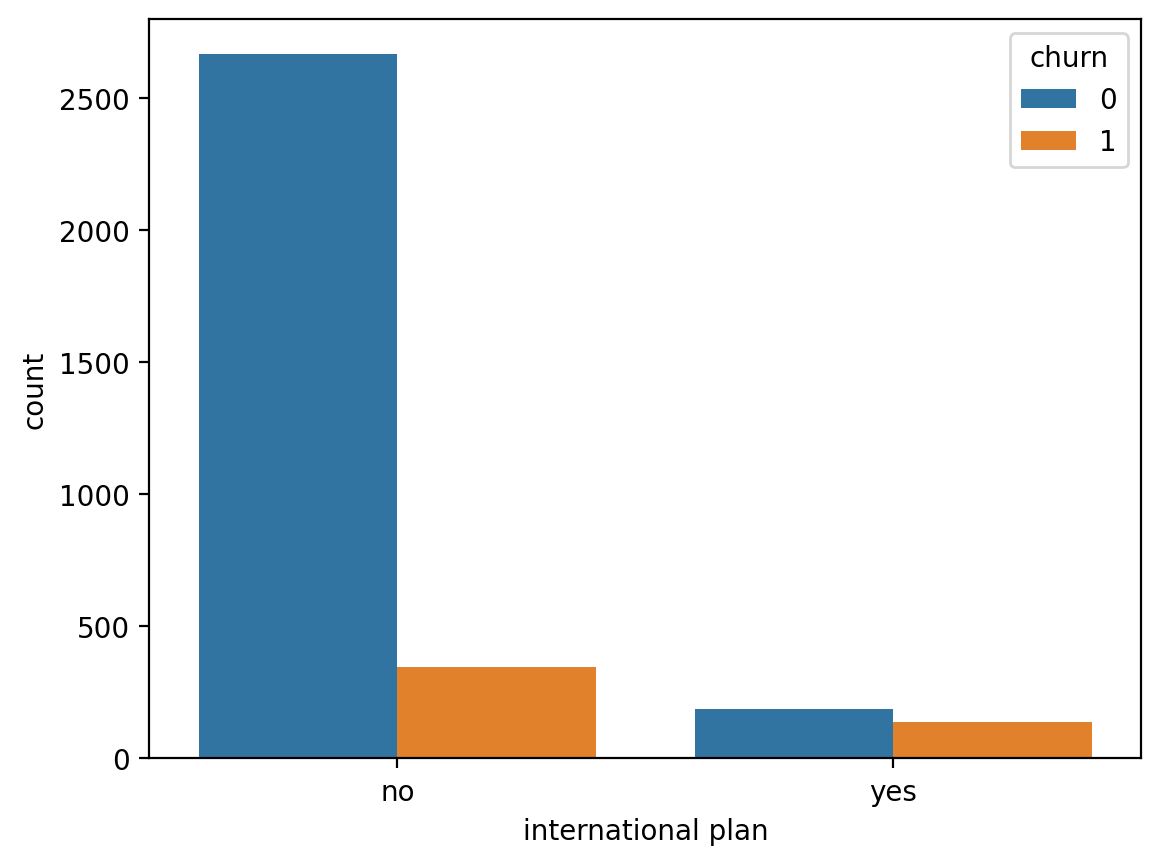

In [136]:
sns.countplot(x="international plan", hue="churn", data=df);

Let's also make a summary table and a picture.

In [139]:
pd.crosstab(df["churn"], df["customer service calls"], margins=True)

customer service calls,0,1,2,3,4,5,6,7,8,9,All
churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


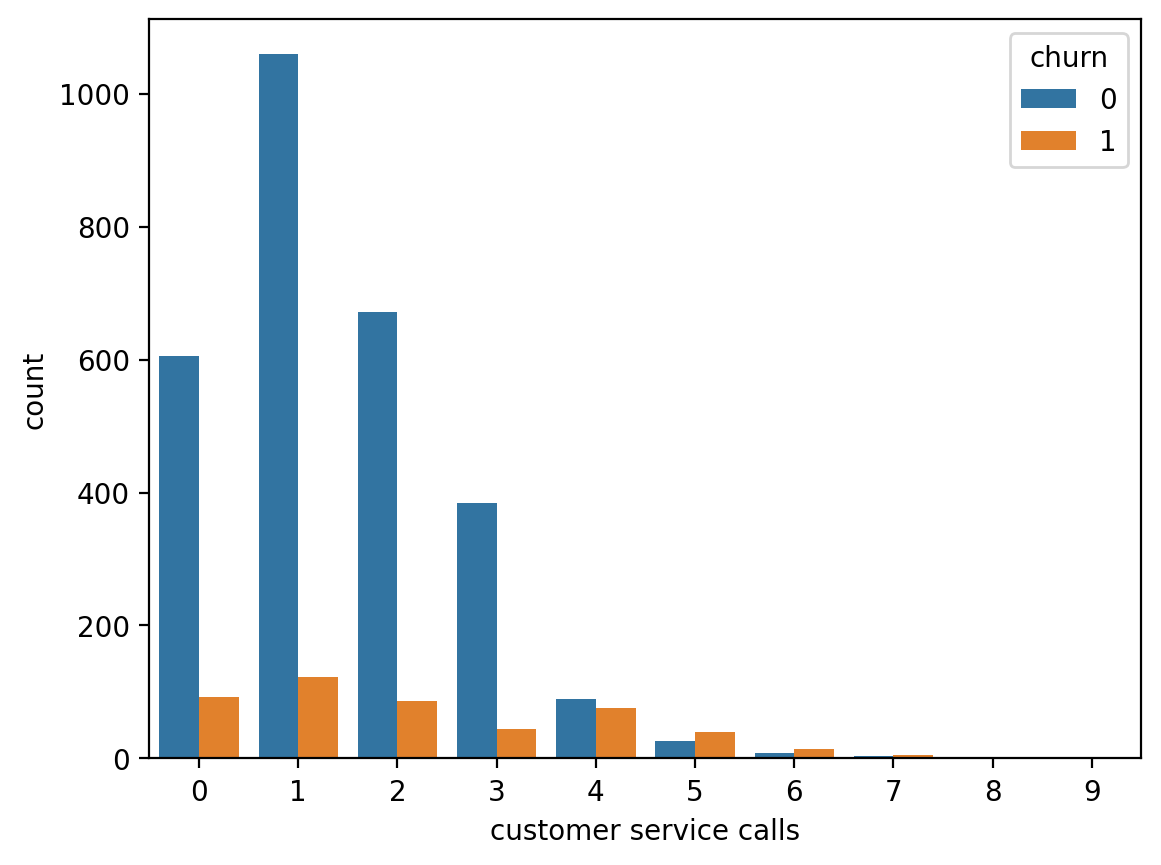

In [140]:
sns.countplot(x="customer service calls", hue="churn", data=df);

In [142]:
df["many_service_calls"] = (df["customer service calls"] > 3).astype("int")

pd.crosstab(df["many_service_calls"], df["churn"], margins=True)

churn,0,1,All
many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


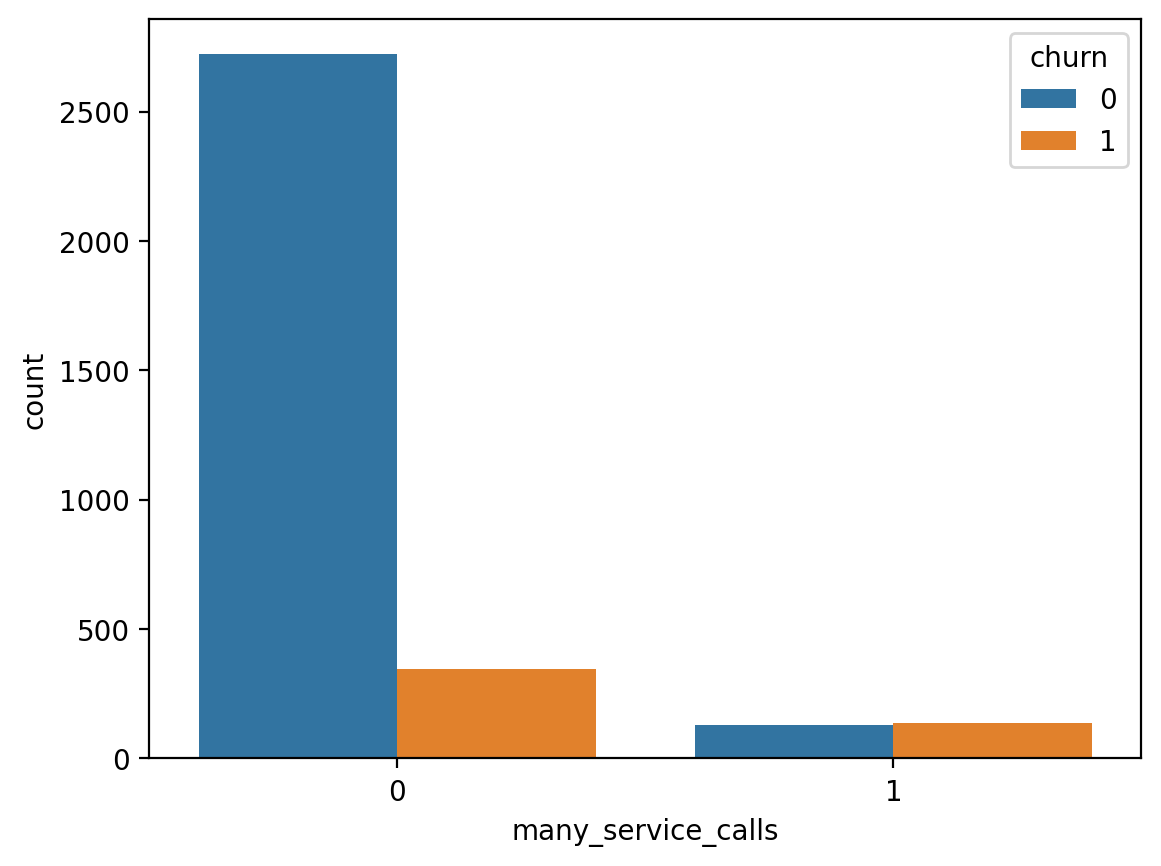

In [143]:
sns.countplot(x="many_service_calls", hue="churn", data=df);

### Good luck